# Aufgabenstellung

Für ein Heizsystem wird ein Glastubus verwendet. Durch eine regelbare Stromzufuhr wird Wärme generiert.
Je mehr Strom eingespeist wird, desto wärmer wird der Tubus.
Der Tubus gibt Wärme an seine Umgebung ab.
Die Menge der abgegebenen Wärme ist proportional zur Oberfläche des Tubus
und des Temperaturunterschiedes zwischen dem Tubus und der Umgebung.
Das Gleichgewicht des Temperatur-Verlustes und der Wärmeerzeugung lässt sich durch folgende Differentialgleichung ausdrücken:

$\begin{align}
m\cdot c_P \frac{dT}{dt} &= Q \\
Q&=q_{in}-q_{out} \\
q_{in} &= q \\
q_{out} &=h_s \cdot A_s(T-T_a)
\end{align}$

Das Ziel ist es ein System zu entwerfen, welches die Temperatur des Glastubus regelt. Hierbei muss darauf geachtet werden, dass die Temperatur möglichst schnell den Zeilwert erreicht und das die Temperaturschwankungen auf ein Minimum reduziert werden.

# Aufgabe 1
In dieser Aufgabe soll die Differentialgleichung an einen Satz von Messdaten "gefittet" werden.
Hiebei sollen $m$ (Masse), sowie $A_s$ (Oberfläche), ermittelt werden.
Die Datei enthält Ergebnisse des Systems auf eine Sprungantwort. Die Werte der x-Achse sind die Zeitpunkte der Messungen in der Einheit Sekunde, startend bei 0 sek. Gemessen wurde die Temperaturdifferzenz zwischen dem Tubus und der Umgebung. Die Differenz wird in Kelvin angegenben und beträgt anfänglich 0 °K.

Die durch die Aufgabenstellung gegebene Differentialgleichung lässt sich explizit lösen:

$T(t)=k_1e^{-\frac{T_a h_s t}{c_p m}} + \frac{q}{T_a h_s}+T_a$

Die Wahl von $k_1$ nimmt einfluss auf den Startwert des Systems zum Zeitpunkt $t=0$. 


Da in der Aufgabenstellung nut die Absolute Temperatur des Tubus gegeben ist sondern die Temperaturdifferenz zwischen Tubus und Umgebung, wird $T-T_a$ als die Variable des Systems betrachtet. Dadurch ändert sich die Differentialgleichung wie folgt:

$T(t)=k_1e^{-\frac{A_s h_s t}{c_p m}} + \frac{q}{A_s h_s}$

Die Formel zeigt, dass die zu erreichende Temperaturdifferenz nicht von der Aussentemperatur abhängt. Dies bedeutet, dass beliebige Temperaturen erreicht werden können, welche in einem gewissen Bereich über der Aussentemperatur liegen, dessen obere Grenze durch die maximale Leistung des Heizelements gebenen ist (bei festen Eigenschaften des Tubus).

Für die Lösung der Differentialgleichung wurde $k_1$ so gewählt, dass zum Zeitpunkt $t=0$ die Temperaturdifferenz bei $0$ liegt.

$k_1= -(\frac{q}{A_s h_s})$


Da es sich um eine Sprungsantwort handelt wird die Heizleisztung $q$ als konstant angesehen. Ebenfalls wird die Umgebungstemperatur $T_a$ als konstant angesehen. Das heißt, dass die Außentemperatur nicht durch den Tubus beeinflusst wird, was nur bedingt der Realität entspricht. Würde dies berücksichtig werden, so würde das Modell wesentlich komplexer werden.

In [4]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
#einlesen der Messdaten

my_data = np.genfromtxt('measurement_data.csv', delimiter=';')
xdata = my_data[:,0]
ydata = my_data[:,1]

In [14]:
#definition der konstanten

hs = 5
q = 1500
Ta = 20
cp = 1078

In [15]:
#funktion zum fit 

def func(t, m, As):
    return ((-(q/(As*hs)))*np.e**(-(As*hs*t)/(cp*m))+q/(As*hs))

In [23]:
#bestimmen der lösung durch fit
# die hier verwendeten startwerte wurden durch grobe abschätzungen ermittelt
popt, pcov = curve_fit(func, xdata, ydata, p0=(10, 1), bounds=([0.1, 0.1],[30, 10]))

In [24]:
#ausgabe der ergebnisse

m = popt[0]
As = popt[1]

residuals = ydata - func(xdata, m, As)
fres = sum(np.abs(residuals))
print('fres: %6.2f ' % fres)
print('m: %6.2f' % m)
print('As: %6.2f' % As)

fres: 3917.38 
m:  13.42
As:   0.95


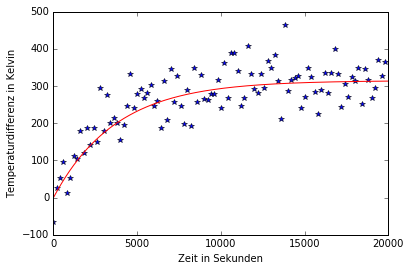

In [45]:
#plotten der ergebnisse

curvex = np.linspace(0,20000,10000)
curvey = func(curvex, m, As)

plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Temperaturdifferenz in Kelvin")

In [34]:
#finde grenzwert der gleichung durch optimierungsverfahren (umwandlung in minimierungsverfahren)
max_x = sc.optimize.fmin(lambda x: -func(x, m, As), 0)

Optimization terminated successfully.
         Current function value: -314.643035
         Iterations: 59
         Function evaluations: 147


# Auswertung
Die rote Kurve beschreibt die Temperaturdifferenz zwischen Tubus und Umgebung in Abhängigkeit zur Zeit, welche durch die Lösung der Differentialgleichung bei den gegebenen Konstanten bestimmt wurde. Die Werte für $m$ und $A_s$ wurden anhand der Messdaten gefittet ($m=13.42$ und $A_s=0.95)$.
Die Messdaten sind als blaue Sterne markiert. Es ist zu erkennen, dass die ermittelte Kurve gegen einen Grenzwert konvergiert ( $max_x = \tilde{}314.643$ ). Trotz starker Streuungen haben die Messdaten einen ähnlichen Verlauf und scheinen gegen den selben Wert zu laufen.

Der Tubus erwärmt sich solange, bis der Energieverlust zur Außenwelt ein Gleichgewicht mit der Leistung des Heizelementes bildet. Die Kurve weißt ein logarithmisches Wachstum auf. Anfangs ist die Temperaturzunahme maximal, läuft aber schnell in eine Sättigungsphase.

Mathemetisch Berechnung der Werte für Masse und Außenfläche:

$m = (\pi*r_{aussen}^2*h - \pi*r_{innen}^2*h)*Dichte = (1*\pi*0.11^2 - 1*\pi*0.1^2) *2500 = 16.4933$ 

$A_s = 2*\pi*r_{isolierung}*h =  2*\pi*0.2*1 = 1.2566$

Durch den Fit ermittelte Werte sind $13.42kg$ für die Masse und Aussenfläche $0.95m^2$ für die Aussenfläche. Der Wert für die Aussenfläche weicht um ca. 25% ab und die gefittete Masse um ca 20%. 

# vergleich überarbeiten wenn wert der eingangsspannung fest steht

In [46]:
m_math = (np.pi*0.11**2 - np.pi * 0.1**2) * 2500
print m_math
As_math = np.pi*0.2*2
print As_math

16.4933614313
1.25663706144


# Teil 2
ab jetzt werden die berechneten Werte für m und As eingesetzt, Ta und nocheinmal gefittes anhand der festen Werte

In [35]:
m = 16.49331431
As = 1.256637061
hs = 5

In [36]:
def func(t, q, Ta):
    return (-((q/(As*hs)+Ta)+Ta)*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)

In [37]:
popt, pcov = curve_fit(func, xdata, ydata, p0=(1000, 30), bounds=([0, -20],[2000, 100]))
q  = popt[0]
Ta = popt[1]

residuals = ydata - func(xdata ,q, Ta)
fres = sum(np.abs(residuals))
print('fres: %6.2f ' % fres)
print('q: %6.2f' % q)
print('Ta: %6.2f' % Ta)

fres: 3938.01 
q: 1876.23
Ta:  14.21


Text(0,0.5,'Y-data')

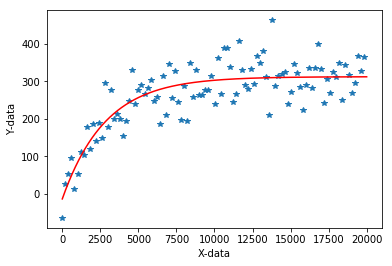

In [38]:
curvex= np.linspace(0,20000,10000)
curvey= func(curvex, q, Ta)
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

# -> wähle Ta als 14 Kelvin/Grad C
Nun ermittle maximale Temperatur des Tubus bei maximaler Heizleistung von 2kW

Berechnung: q_in = q_out, also Energieverlust pro Zeit ist gleich der Heizleistung von 2kW

In [39]:
Ta = 7.11

Die maximal zu erreichende Temperatur liegt bei: 325.41988629420985 (bei festem Ta von 7.11.


314.1176470588235

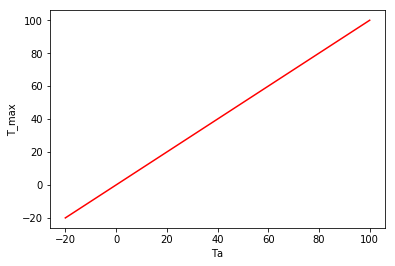

In [40]:
#2 - hs*As*(T-Ta)= 0
T_max = 2000/(hs*As)+Ta 
print ("Die maximal zu erreichende Temperatur liegt bei: {} (bei festem Ta von {}.".format(T_max, Ta))

def maxT(Ta_local):
    return 2000/(hs*As)+Ta_local

aussentemperatur = np.linspace(-20,100,120)
T_max= maxT(aussentemperatur)
plt.plot(aussentemperatur,aussentemperatur,'r')
plt.xlabel("Ta")
plt.ylabel("T_max")

2000/(hs*1.36)+20

Das System ist in dem Sinne linear, dass bei Doppelter Leistung sich auch eine doppelt so hohe Temperatur einstellt.

Text(0,0.5,'Y-data')

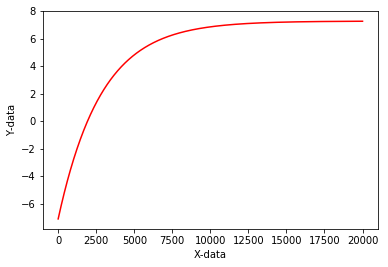

In [41]:
curvex= np.linspace(0,20000,1000)
curvey= func(curvex, 1, Ta)
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

Das die Messadten im Negativen Bereich beginnen, sieht man in dem hier präsentierten Graphen. Die Temperatur steigt nimmt in den ersten 5000 Sekunden um 12 Grad zu, jedoch stellt sich die Endtemperatur erst nach ca 13000 Sekunden, bei 0 Grad ein. 

In [42]:
f = 1000000
#IST DAS SCHUMMELEI? MÖGLICH...
def u(t, f):
    return 1000*np.sin(np.pi*((f*2*t)%2))

In [43]:
for t in range(10):
    print(t, u(t/2, f))
#stelle diese Aufgabe zurück, frage mal nach: ist immer 0 gewollt? was für ein Offset?

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0


166.26494314710493


Text(0,0.5,'Y-data')

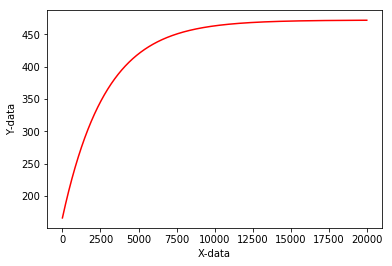

In [44]:
# simuliere constante von 1kW -> berechne erzielte Temperatur bei 1kW leistung
p_max = 1000
T_1kW = p_max/(hs*As)+Ta
print(T_1kW)

# Funktion der Temperatur, welche bei der einer Temperatur anfängt, welche bei einer Leistung von 1kW entsteht
def func_with_pre_temp(t, q, T_pre):
    return (-(q/(As*hs)+Ta)*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)+T_pre

curvex= np.linspace(0,20000,10000)
curvey= func_with_pre_temp(curvex, q, T_1kW)
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

In [45]:
def func_1(t, q, start_temp):
    return (-((q/(As*hs)+Ta)-start_temp)*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)
    
q = 1000
time_offset = 0
start_temp = 0
curvex = np.arange(0, 300*60, 0.5)
curvey = np.arange(0, 300*60, 0.5)


m = 16.49
As = 1.35
Ta = 7.11

for i in range(len(curvex)):
    if(curvex[i] == 1800):
        q = 2000
        time_offset = 1800
        start_temp = curvey[i-1]
    curvey[i] = func_1(curvex[i]-time_offset, q, start_temp)

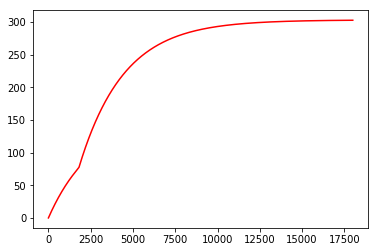

In [46]:
plt.plot(curvex, curvey, 'r')

In [47]:
print(curvey[4000])

93.42914537794094


In [48]:
curvex_3 = np.arange(0, 250*60, 0.5)
curvey_3 = np.arange(0, 250*60, 0.5)

start_temp = 0
for i in range(len(curvex_3)):
    q = 1000+(np.random.rand(1)-0.5)*1000
    curvey_3[i] = func_1(0.5, q, start_temp)
    start_temp =  curvey_3[i]

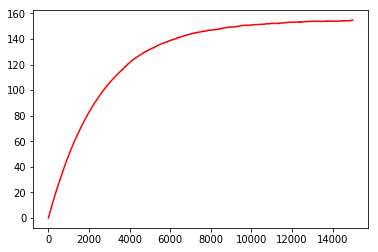

In [49]:
plt.plot(curvex_3, curvey_3, 'r')